# House price Dataset - Feature engineering & Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset

df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

In [3]:
print(df.shape)

(1460, 81)


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 1. Handling Missing Data

## Step 1 : Analysing Missing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [8]:
# !pip install missingno

In [9]:
import missingno as msno

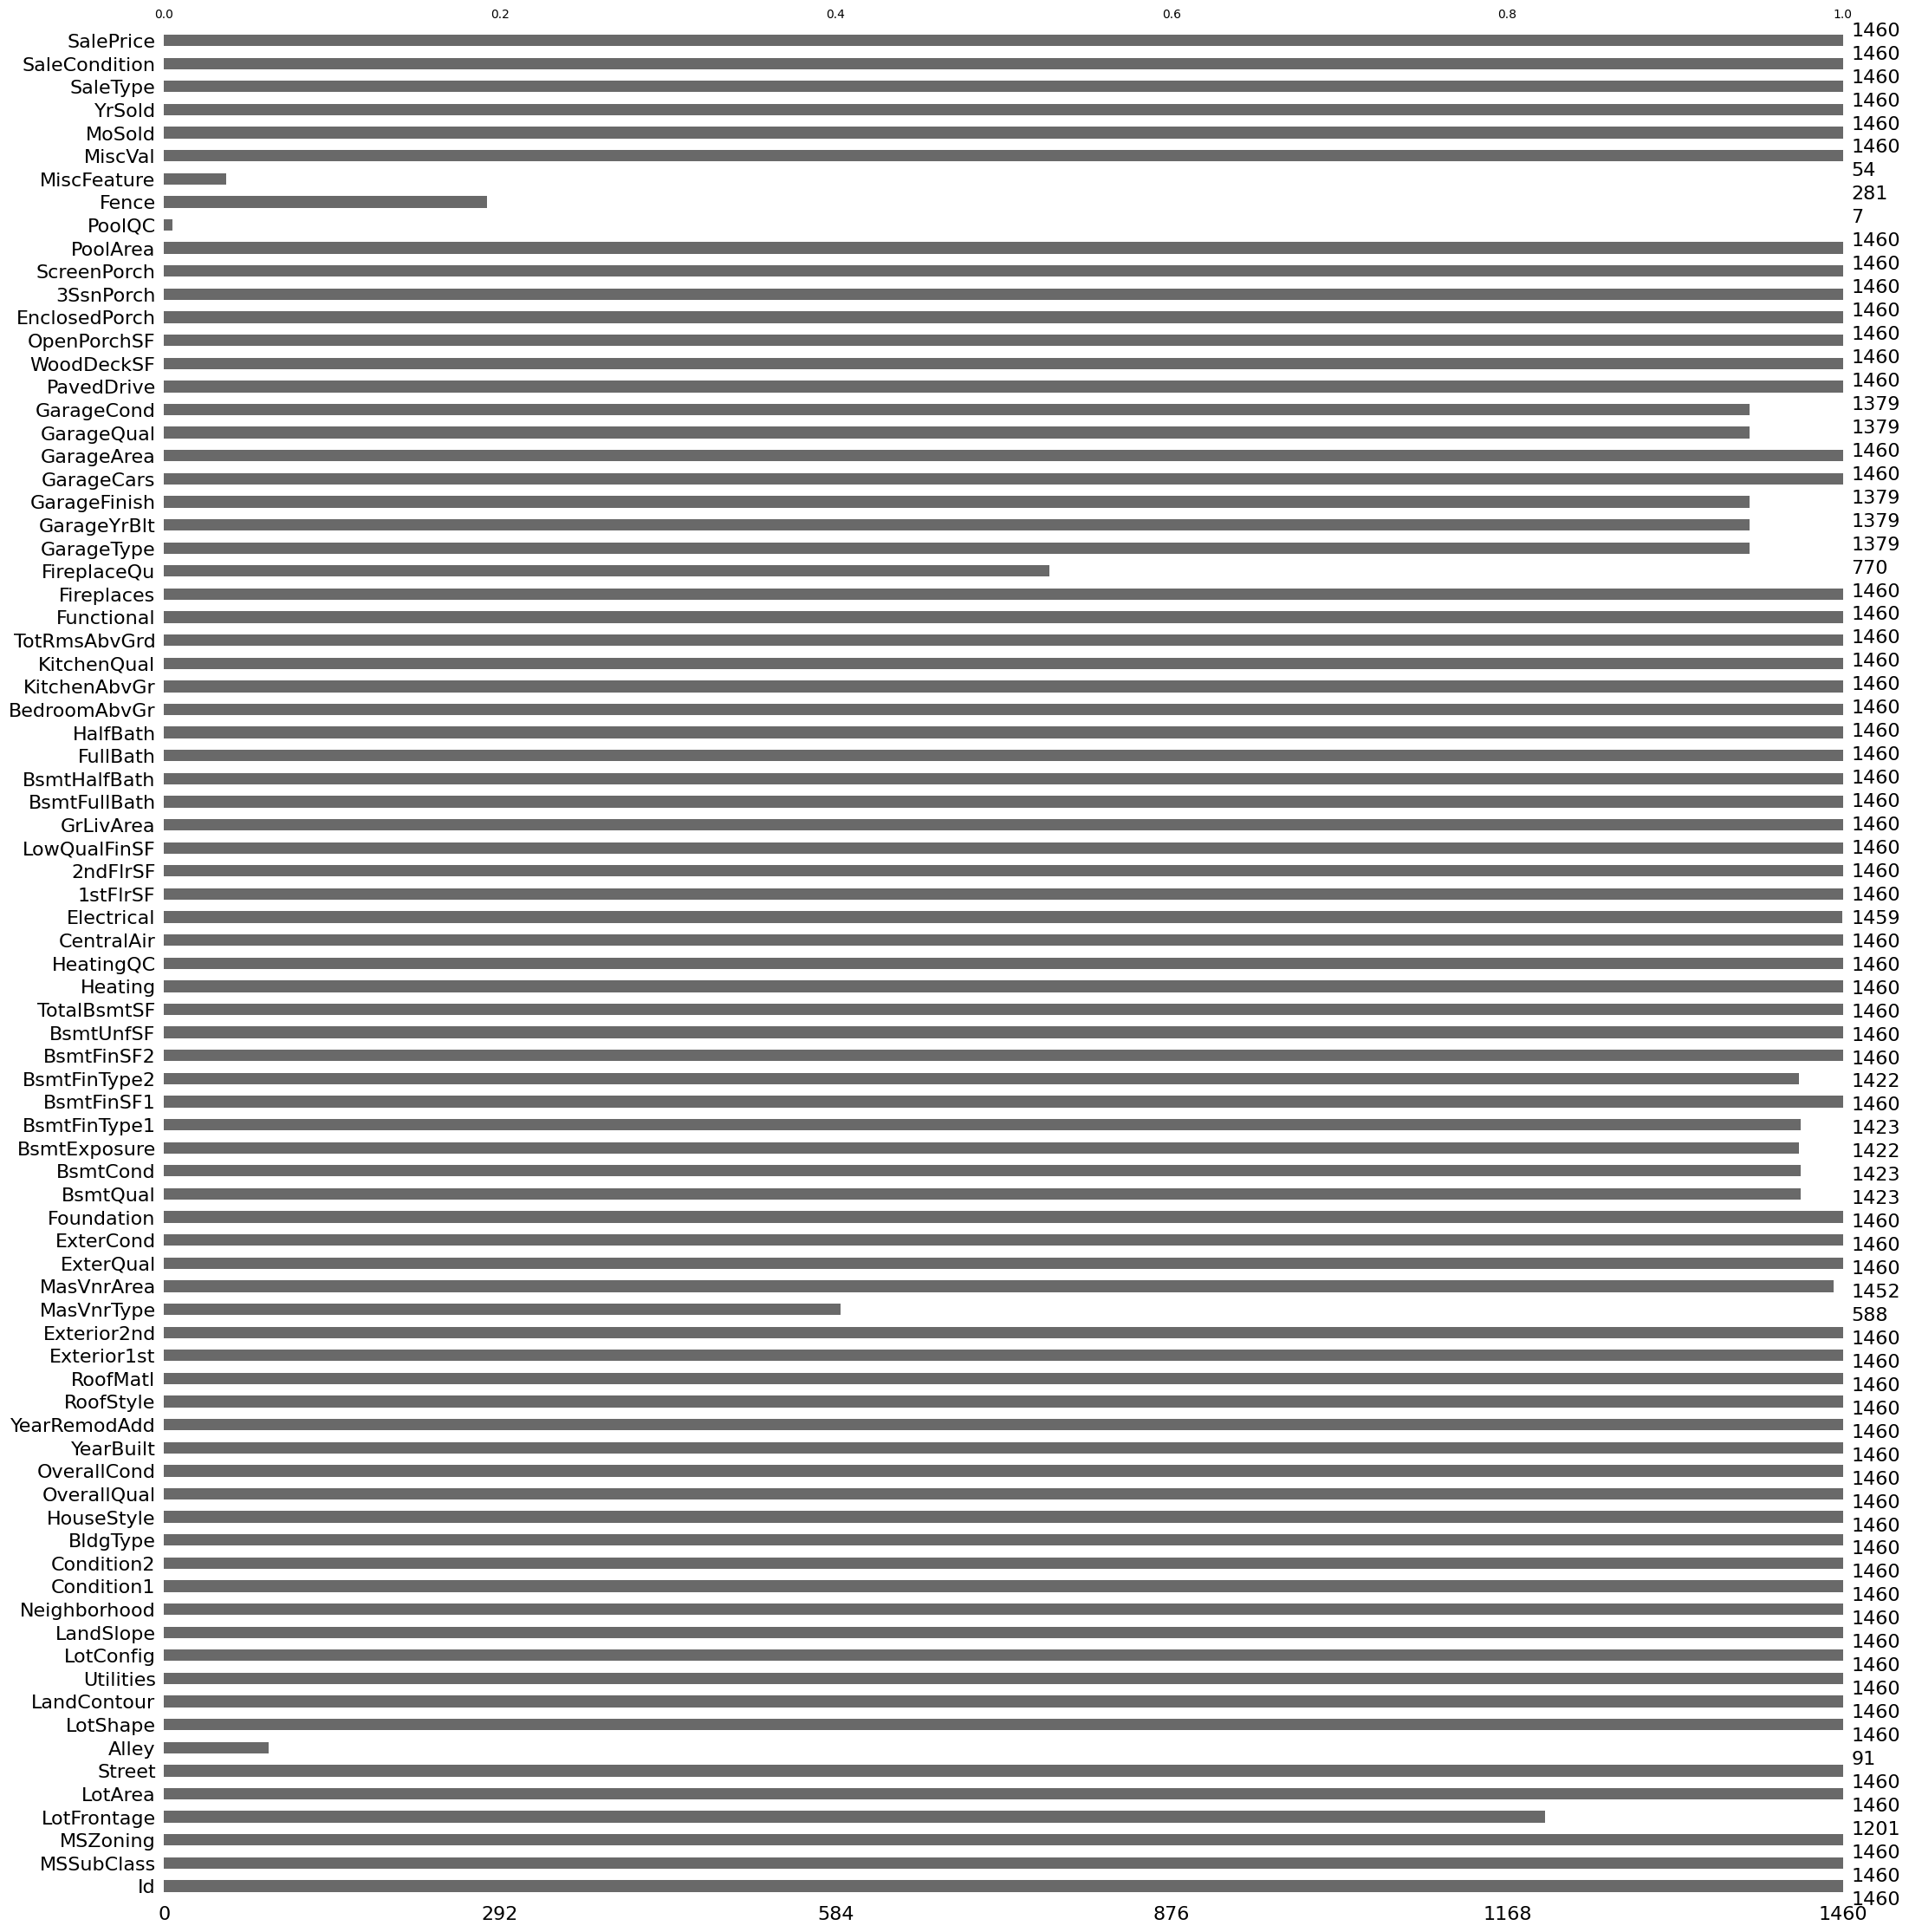

In [10]:
plt.figure(figsize=(12, 6))
msno.bar(df)
plt.show()

# Shows how much data is missing column-wise
# long-bars = complete data
# short-bars = lots of missing values

<Figure size 1200x600 with 0 Axes>

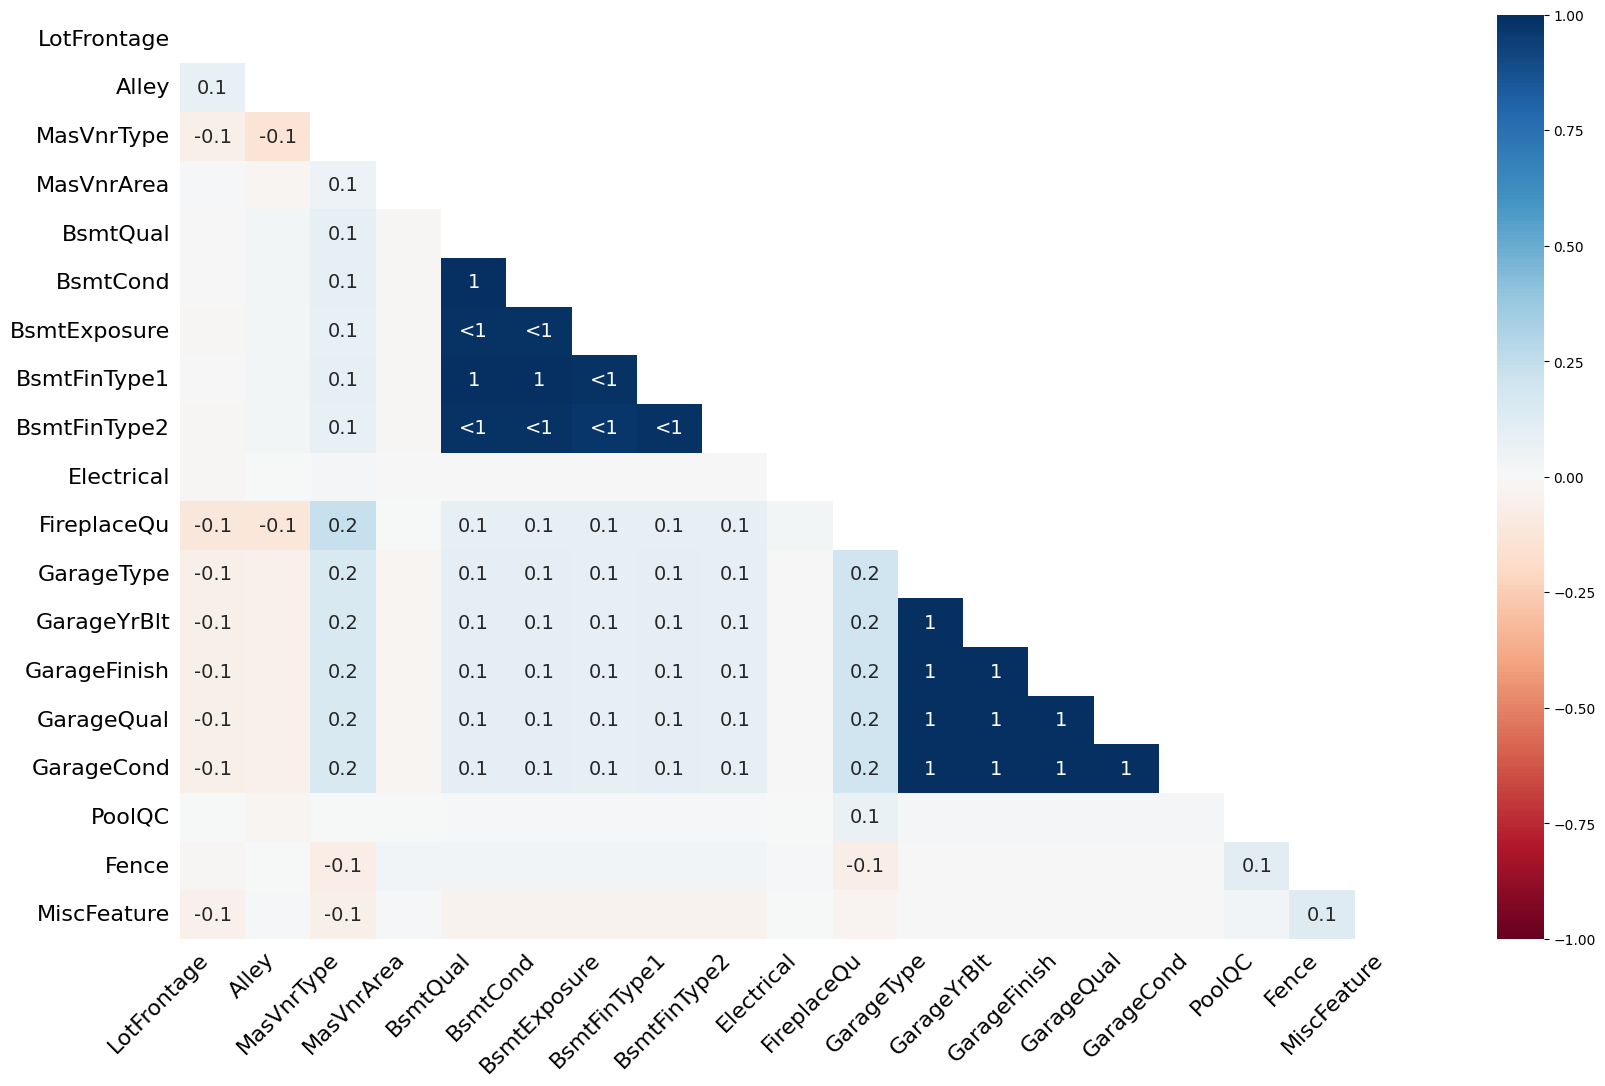

In [11]:
plt.figure(figsize=(12, 6))
msno.heatmap(df)
plt.show()

# values close to 1 = two columns tend to be missing together - present, marks
# values close to 0 = no relationship
# values negative = if one missing, the other is usually present - name, present

# class-test [name, present, marks]

# Case 1 : If person is not present, will they have their name in register ? 
# - negative case, large negative value - (name, present), (name, marks)

# Case 2 : If person is present, will they have score in the marksheet?
# - Absent, they will not have score (present, marks)



# Step 2 - Deletion method

In [12]:
# listwise deletion (Case deletion)
df_listwise = df.dropna()
print("Original Shape : ", df.shape)
print("After listwise deletion Shape : ", df_listwise.shape)

Original Shape :  (1460, 81)
After listwise deletion Shape :  (0, 81)


# Step 3 - Simple Imputation

Instead of deleting, we fill missing values with estimates.

In [13]:
# Function to check before and after of imputation

def compare_imputation(df_before, df_after, column_name):
    missing_indices = {column_name : df_before[df_before[column_name].isnull()].index.to_list() for column_name in df_before.columns if df_before[column_name].isnull().any()}

    if column_name not in missing_indices:
        print(f"No missing values were found in column '{column_name}'")
        return

    idx_list = missing_indices[column_name]

    comparison = pd.DataFrame({
        "Before" : df_before.loc[idx_list,column_name], 
        "After" : df_after.loc[idx_list,column_name], 
    })

    print(f"Changes in column : {column_name}")
    return comparison



In [14]:
# (a) Mean inputation (numerical Data)

df_mean = df.copy()
df_mean['LotFrontage'].fillna(df_mean['LotFrontage'].mean(), inplace=True)

C:\Users\scl\AppData\Local\Temp\ipykernel_34056\398266078.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['LotFrontage'].fillna(df_mean['LotFrontage'].mean(), inplace=True)


In [15]:
df_mean = df.copy()
df_mean.fillna({'LotFrontage': df_mean['LotFrontage'].mean()}, inplace=True)

In [16]:
compare_imputation(df, df_mean, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,70.049958
12,NaN,70.049958
14,NaN,70.049958
16,NaN,70.049958
24,NaN,70.049958
31,NaN,70.049958
42,NaN,70.049958
43,NaN,70.049958
50,NaN,70.049958
64,NaN,70.049958


In [17]:
# Issue with using mean : 
# it will pull the distribution towards mean
# underestimate spread

In [18]:
# (b) median imputation (numerical data)
# house - 500K, 750K, 400K, 10M

df_median = df.copy()
df_median.fillna({'LotFrontage': df_median['LotFrontage'].median()}, inplace=True)

In [19]:
compare_imputation(df, df_median, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,69.0
12,NaN,69.0
14,NaN,69.0
16,NaN,69.0
24,NaN,69.0
31,NaN,69.0
42,NaN,69.0
43,NaN,69.0
50,NaN,69.0
64,NaN,69.0


In [20]:
# (c) mode imputation (cetogorial data)
# house - 90% of the house are in URBAN area, 10%

In [21]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [22]:
df_mode = df.copy()
df_mode.fillna({'GarageType': df_mode['GarageType'].mode()[0]}, inplace=True)

In [23]:
df_mode['GarageType'].mode()[0]

'Attchd'

In [24]:
compare_imputation(df, df_mode, "GarageType").head(10)

Changes in column : GarageType


,Before,After
39,NaN,Attchd
48,NaN,Attchd
78,NaN,Attchd
88,NaN,Attchd
89,NaN,Attchd
99,NaN,Attchd
108,NaN,Attchd
125,NaN,Attchd
127,NaN,Attchd
140,NaN,Attchd


In [25]:
import seaborn as sns

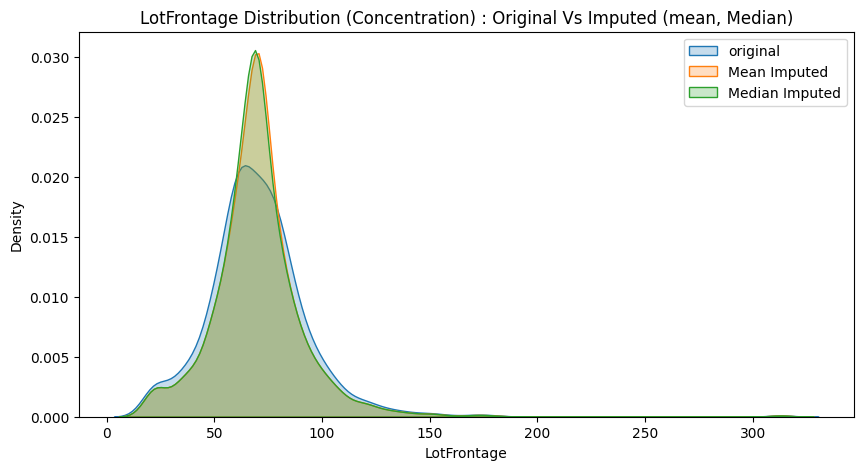

In [26]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['LotFrontage'], label="original", fill=True)
sns.kdeplot(df_mean['LotFrontage'], label="Mean Imputed", fill=True)
sns.kdeplot(df_median['LotFrontage'], label="Median Imputed", fill=True)
plt.legend()
plt.title("LotFrontage Distribution (Concentration) : Original Vs Imputed (mean, Median)")
plt.show()

In [27]:
# Is density interpreted as probability here? NO, they are not equal : PDF, PMF, CDF

# Step 4 : KNN Imputation

In [28]:
# !pip install scikit-learn

In [29]:
from sklearn.impute import KNNImputer

In [30]:
knn_inputer = KNNImputer(n_neighbors=5)

In [31]:
df_knn = df.copy()
columns = ['LotFrontage', 'LotArea', 'YearBuilt']
df_knn[columns] = knn_inputer.fit_transform(df_knn[columns])

In [32]:
compare_imputation(df, df_knn, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,80.2
12,NaN,86.8
14,NaN,67.0
16,NaN,75.4
24,NaN,60.2
31,NaN,66.4
42,NaN,83.6
43,NaN,75.8
50,NaN,96.2
64,NaN,80.2


In [33]:
df_knn_2 = df.copy()
numeric_cols = df_knn_2.select_dtypes(include=[np.number]).columns
df_knn_2[numeric_cols] = knn_inputer.fit_transform(df_knn_2[numeric_cols])

In [34]:
compare_imputation(df, df_knn_2, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,75.6
12,NaN,76.6
14,NaN,75.2
16,NaN,90.2
24,NaN,66.0
31,NaN,67.6
42,NaN,77.0
43,NaN,63.0
50,NaN,68.6
64,NaN,76.4


## Step 5 - Regression Imputation (Advanced)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
df_reg = df.copy()
train_data = df_reg.dropna(subset=['LotFrontage'])
test_data = df_reg[df_reg["LotFrontage"].isnull()]

In [37]:
X_train = train_data[["LotArea", "OverallQual", "OverallCond"]]
y_train = train_data["LotFrontage"]

# we want "LotArea", "OverallQual", "OverallCond" columns to decide the value of LotFrontage

In [38]:
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
df_reg.loc[df_reg["LotFrontage"].isnull(), "LotFrontage"] = reg.predict(test_data[["LotArea", "OverallQual", "OverallCond"]])

In [40]:
compare_imputation(df, df_reg, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,73.015238
12,NaN,70.063978
14,NaN,71.120296
16,NaN,70.526948
24,NaN,63.397097
31,NaN,64.735937
42,NaN,65.011931
43,NaN,65.525990
50,NaN,74.181950
64,NaN,72.292430


# 2. Handling Outliers

In [41]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


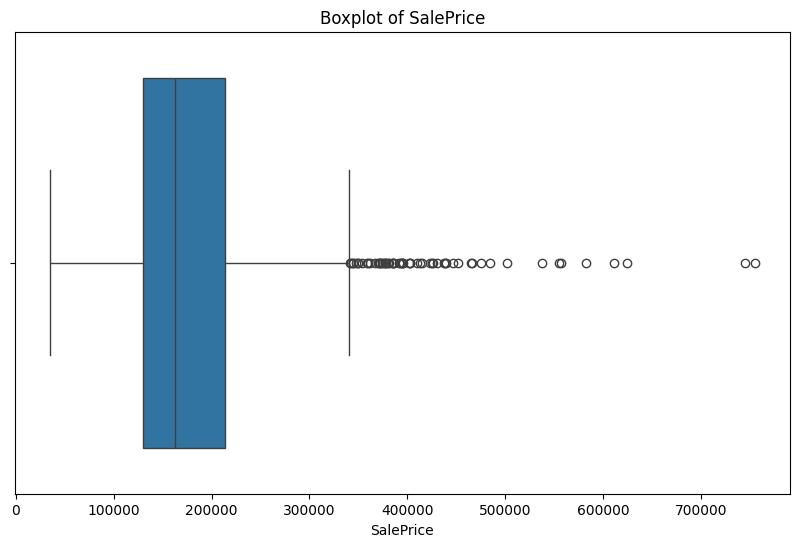

In [43]:
# 1. Visualization outliers

# Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(x=df['SalePrice'])
plt.title("Boxplot of SalePrice")
plt.show()

# left side of  blue box start is lower Q1
# right side of blue box end is upper Q3
# line between blue box is median
# left whisker = Q1 - 1.5*IQR
# right whisker = Q3 + 1.5*IQR


In [44]:
# IQR

import numpy as np

In [45]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    higher = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > higher)]
    return lower, higher, outliers[[col]]

    # IF COLUMN HAS 20% OF OUTLIERS THEN PRINT THE NAME OF THE COLUMN

In [46]:
lower, higher, outliers_saleprice = detect_outliers_iqr(df, "SalePrice")

In [47]:
df.shape[0]

1460

In [48]:
len(outliers_saleprice)
print(outliers_saleprice.min())
print(outliers_saleprice.max())

SalePrice    341000
dtype: int64
SalePrice    755000
dtype: int64


In [49]:
# Z-score

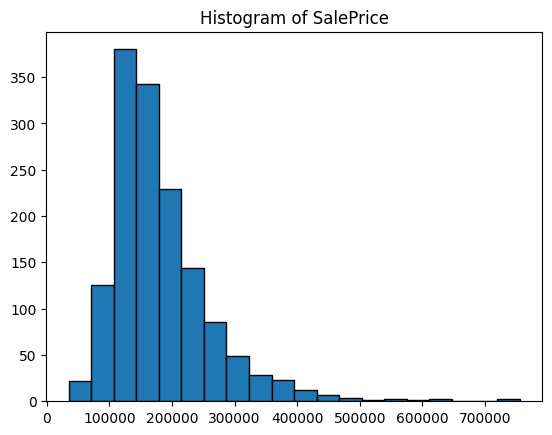

In [50]:
plt.hist(df['SalePrice'], bins=20, edgecolor='black')
plt.title("Histogram of SalePrice")
plt.show()

In [51]:
import scipy.stats as stats

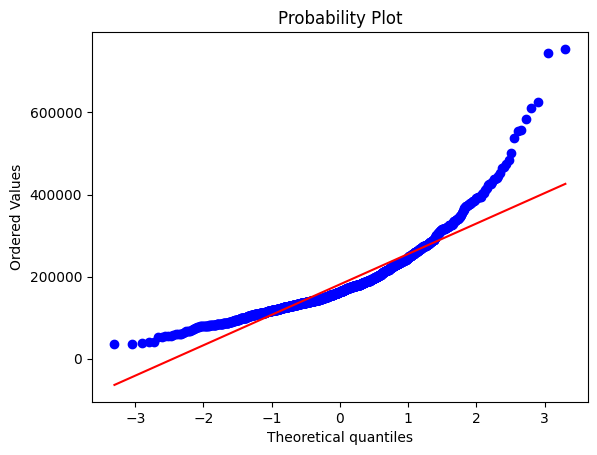

In [52]:
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.show()

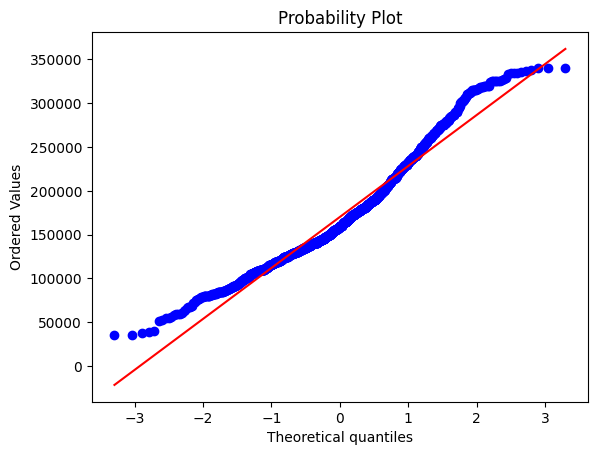

In [53]:
# After removing outliers
df_temp = df.copy()
df_final = df_temp[(df_temp['SalePrice'] >= lower) & (df_temp['SalePrice'] <= higher)]

stats.probplot(df_final['SalePrice'], dist="norm", plot=plt)
plt.show()

In [54]:


# how many SD away a value is
# 68% (1)
# 95% (2)
# 99% (two tailed) : 2.58
# 99.7% (two tailed) : 3
# |z| > 3

from scipy.stats import zscore


In [55]:
df["SalePrice_zscore"] = zscore(df["SalePrice"])
outliers_z = df[df["SalePrice_zscore"].abs() > 2]


# 100 points --> ML
# 63 outliers --> 
# 22 outliers --> 

# data --> P1
# data --> p2
# data --> google
# data --> openai

In [56]:
len(outliers_z)

63

In [57]:
outliers_z

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_zscore
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,New,Partial,345000,2.066086
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,385000,2.569767
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,NaN,0,10,2006,New,Partial,438780,3.246967
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,New,Partial,383970,2.556797
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,New,Partial,372402,2.411133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2010,WD,Normal,410000,2.884568
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2007,WD,Normal,466500,3.596018
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,10,2009,WD,Normal,377500,2.475327
1417,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2009,WD,Normal,340000,2.003126


In [58]:
# Winsorization (Capping extreme values)
# fold = 0.05 (two-tail)
# Anything below the 5th percentile becomes --> 5th percentile value
# Anything above the 95th percentile becomes --> 95th percentile value


In [59]:
# !pip install feature_engine

In [60]:
from feature_engine.outliers import Winsorizer

In [61]:
col_name = "LotArea"

In [62]:
winsor = Winsorizer(capping_method="quantiles", tail="both", fold=0.05, variables=[col_name])
df_winsor = winsor.fit_transform(df)

In [63]:
print(df.shape)
print(df_winsor.shape)

(1460, 82)
(1460, 82)


In [64]:
percentile_5 = df[col_name].quantile(0.05)
percentile_95 = df[col_name].quantile(0.95)

print(f"5th percentile of {col_name} : {percentile_5}")
print(f"95th percentile of {col_name} : {percentile_95}")

5th percentile of LotArea : 3311.7000000000003
95th percentile of LotArea : 17401.149999999998


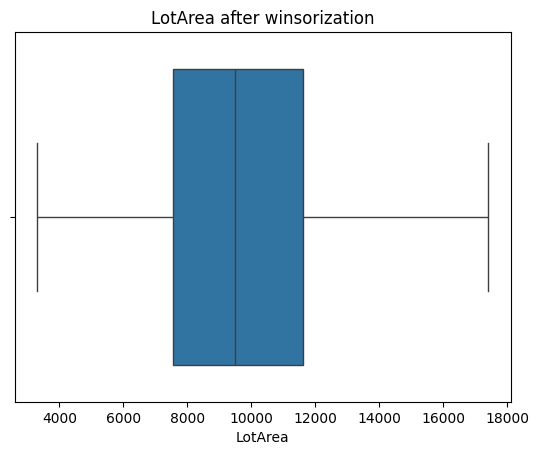

In [65]:
sns.boxplot(x=df_winsor[col_name])
plt.title(f"{col_name} after winsorization")
plt.show()

In [66]:
def compare_outliers(original_df, modified_df, column):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=original_df[column])
    plt.title(f"{column} - Before")

    plt.subplot(1,2,2)
    sns.boxplot(x=modified_df[column])
    plt.title(f"{column} - After winsorization")

    plt.show()

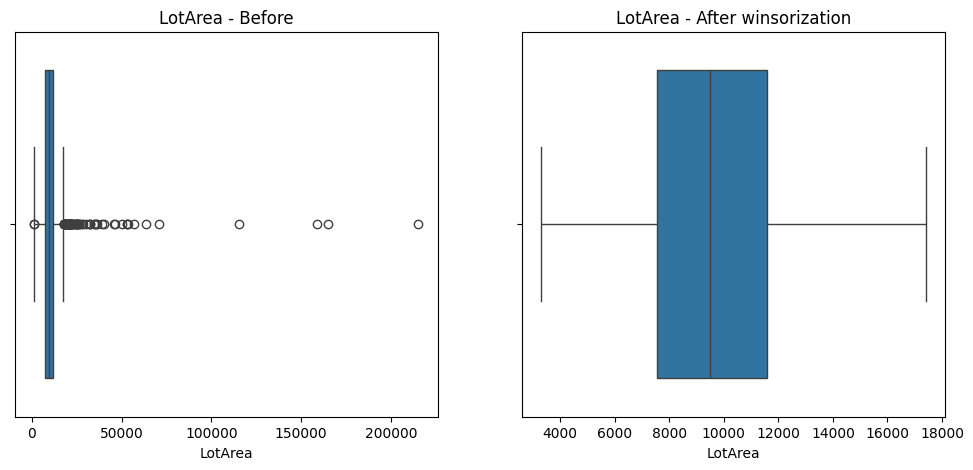

In [67]:
compare_outliers(df, df_winsor, "LotArea")

# 4. Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [69]:
def summary_stats(series):
    return {
        "mean" : series.mean(),
        "std" : series.std(),
        "skewness" : series.skew(),
    }

def compare_distribution(original, transformed, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(original, bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"{title} - Before")
    sns.histplot(transformed, bins=30, kde=True, ax=axes[1])
    axes[1].set_title(f"{title} - After")
    plt.show()

Before: {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After: {'mean': np.float64(-2.677107310003708e-16), 'std': np.float64(1.0004165798972613), 'skewness': np.float64(2.1635691423248846)}


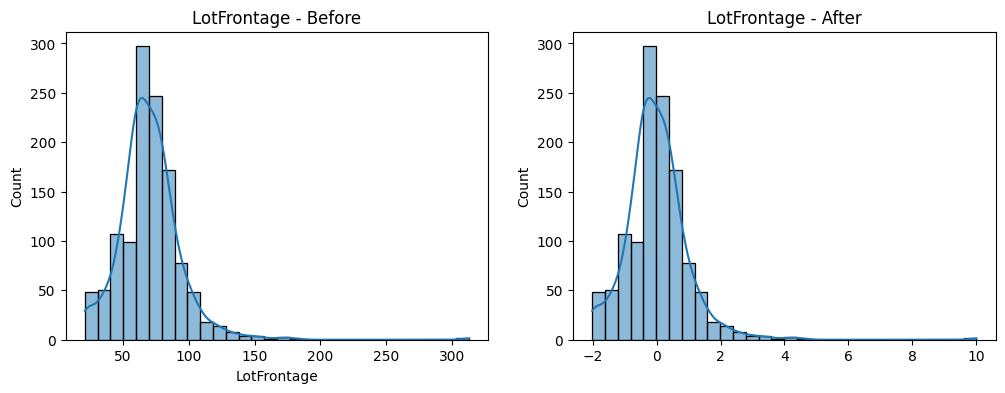

In [70]:
# 1. Standard Scaling
# Formula: z = (x - μ) / σ
col = "LotFrontage"
scaler = StandardScaler()
lot_scaled = scaler.fit_transform(df[[col]])
print(f"Before: {summary_stats(df[col].dropna())}")
print(f"After: {summary_stats(pd.Series(lot_scaled.flatten()))}")
compare_distribution(df[col].dropna(), lot_scaled.flatten(), col)


Before: {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After: {'mean': np.float64(0.1679793094795433), 'std': np.float64(0.0831669581317918), 'skewness': np.float64(2.1635691423248846)}


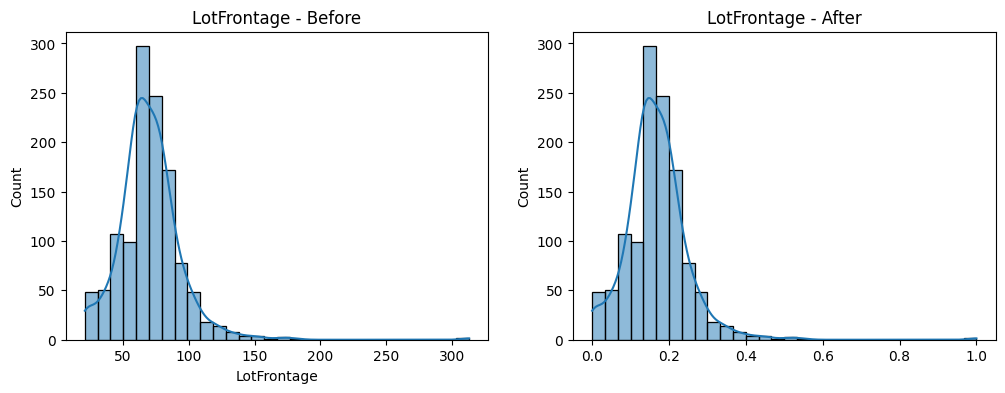

In [71]:
# 2. MinMax Scaling
# Formula: x' = (x - min) / (max - min)

col = "LotFrontage"
scaler = MinMaxScaler()
lot_scaled = scaler.fit_transform(df[[col]])
print(f"Before: {summary_stats(df[col].dropna())}")
print(f"After: {summary_stats(pd.Series(lot_scaled.flatten()))}")
compare_distribution(df[col].dropna(), lot_scaled.flatten(), col)


Before: {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After: {'mean': np.float64(0.04999801752507831), 'std': np.float64(1.156416751165867), 'skewness': np.float64(2.163569142324884)}


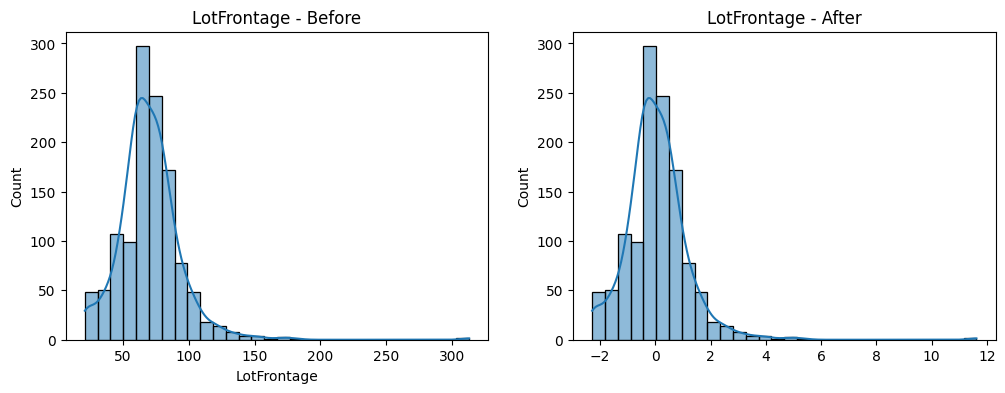

In [72]:
# 3. Robust Scaling
# Formula: x' = (x - median) / IQR

col = "LotFrontage"
scaler = RobustScaler()
lot_scaled = scaler.fit_transform(df[[col]])
print(f"Before: {summary_stats(df[col].dropna())}")
print(f"After: {summary_stats(pd.Series(lot_scaled.flatten()))}")
compare_distribution(df[col].dropna(), lot_scaled.flatten(), col)


Before: {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After: {'mean': np.float64(4.207108941714102), 'std': np.float64(0.3462283309333295), 'skewness': np.float64(-0.7287278423055492)}


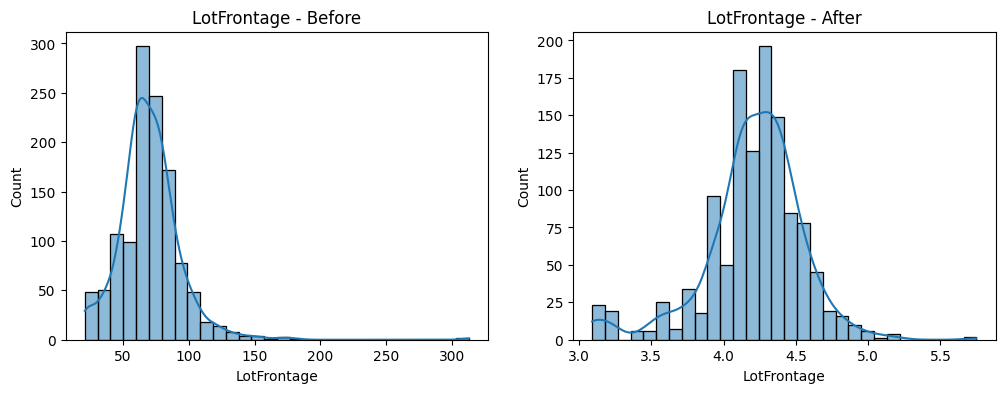

In [73]:
# 4. Log Transformation
# Formula: x' = log(x + 1)

col = "LotFrontage"
log_trans = np.log1p(df[col].dropna())
print(f"Before: {summary_stats(df[col].dropna())}")
print(f"After: {summary_stats(log_trans)}")
compare_distribution(df[col].dropna(), log_trans, col)


Before: {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.163569142324884)}
After: {'mean': np.float64(-7.3805334126621565e-16), 'std': np.float64(1.0004165798972613), 'skewness': np.float64(0.11527708161436032)}


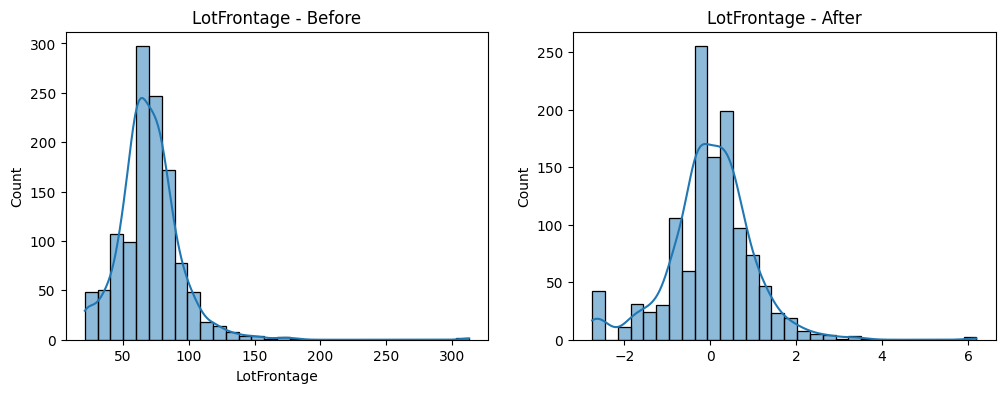

In [74]:
# 5. Yeo-Johnson
# Formula: x' = log(x + 1)

col = "LotFrontage"
pt = PowerTransformer(method="yeo-johnson")
lot_trans = pt.fit_transform(df[[col]])
print(f"Before: {summary_stats(df[col])}")
print(f"After: {summary_stats(pd.Series(lot_trans.flatten()))}")
compare_distribution(df[col].dropna(), lot_trans.flatten(), col)


Before: {'mean': np.float64(10516.828082191782), 'std': np.float64(9981.26493237915), 'skewness': np.float64(12.207687851233496)}
After: {'mean': np.float64(9.490125580357503e-16), 'std': np.float64(1.0003426417780865), 'skewness': np.float64(0.026569113431683063)}


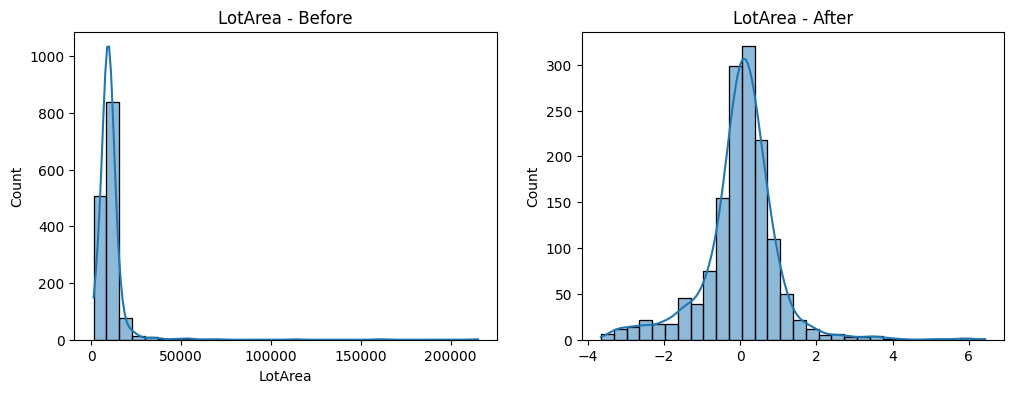

In [75]:
col = "LotArea"
pt = PowerTransformer(method="yeo-johnson")
lot_trans = pt.fit_transform(df[[col]])
print(f"Before: {summary_stats(df[col])}")
print(f"After: {summary_stats(pd.Series(lot_trans.flatten()))}")
compare_distribution(df[col].dropna(), lot_trans.flatten(), col)

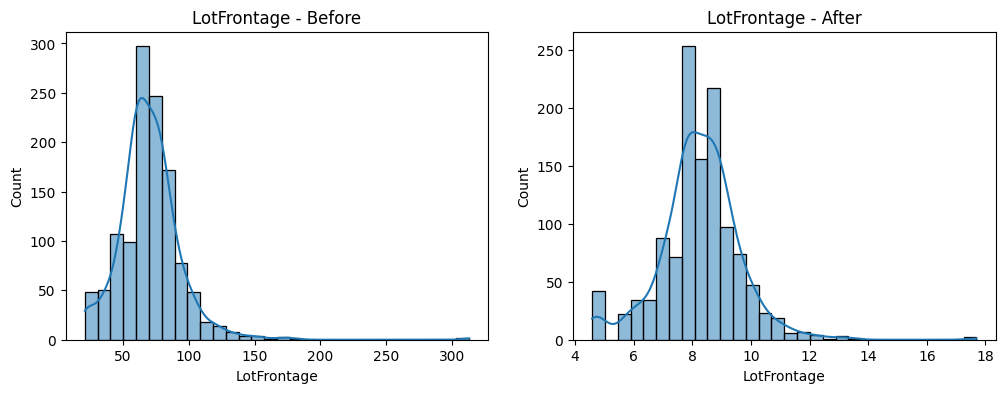

In [76]:
# square-root transformation
# root of x

df_applied = df.copy()
col = "LotFrontage"

df_applied[col] = df_applied[col].apply(lambda x : np.sqrt(x))
compare_distribution(df[col], df_applied[col], col)


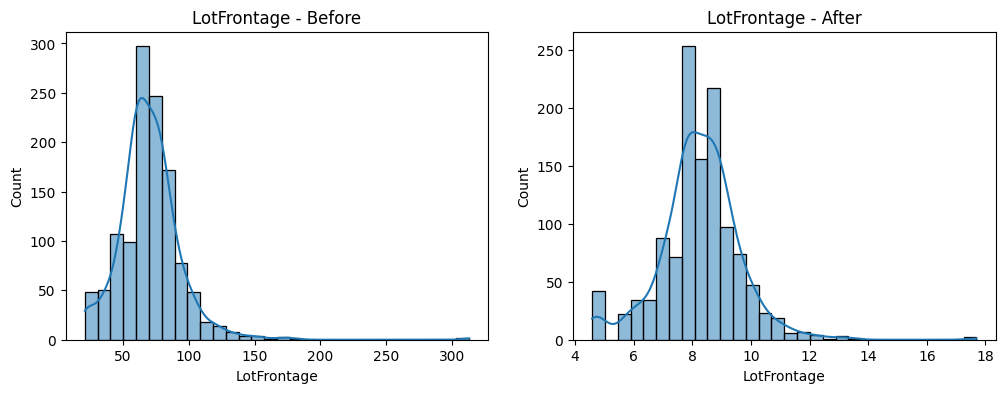

In [77]:
# square-root transformation
# root of x

df_transformed = df.copy()
col = "LotFrontage"

df_transformed[col] = np.sqrt(df_transformed[col])
compare_distribution(df[col], df_transformed[col], col)

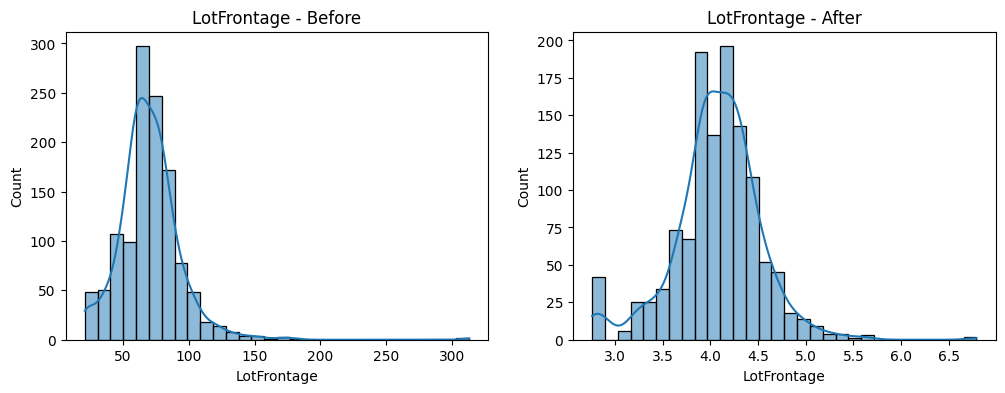

In [78]:
# cube-root transformation
# root of x

df_transformed = df.copy()
col = "LotFrontage"

df_transformed[col] = np.cbrt(df_transformed[col])
compare_distribution(df[col], df_transformed[col], col)

# 5. Data Encoding Technique

In [79]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [80]:
# Label-encoding (without order)

from sklearn.preprocessing import LabelEncoder

col = "MSZoning"
print("Before:", df[col].unique())

# Method : 1
df["MSZoning_label"] = pd.factorize(df[col])[0]

# Method : 2
# sorts alphabetically before assigining numbers
le = LabelEncoder()
df["MSZoning_label_sklearn"] = le.fit_transform(df[col])

print("After Pandas factorize:", df["MSZoning_label"].unique())
print("After Sklearn:", df["MSZoning_label_sklearn"].unique())

Before: ['RL' 'RM' 'C (all)' 'FV' 'RH']
After Pandas factorize: [0 1 2 3 4]
After Sklearn: [3 4 0 1 2]


In [81]:
# Label-encoding (with order)
from sklearn.preprocessing import OrdinalEncoder

# Actual : ['RL' 'RM' 'C (all)' 'FV' 'RH']
ordinal_order = [['C (all)', 'RM', 'RH', 'RL', 'FV']]

oe = OrdinalEncoder(categories=ordinal_order)
df["MSZoning_ordinal"] = oe.fit_transform(df[[col]])

print("Before:", df[col].unique())
print("After Pandas factorize:", df["MSZoning_label"].unique())
print("After OrdinalEncoder (with order):", df["MSZoning_ordinal"].unique())


Before: ['RL' 'RM' 'C (all)' 'FV' 'RH']
After Pandas factorize: [0 1 2 3 4]
After OrdinalEncoder (with order): [3. 1. 0. 4. 2.]


In [82]:
# 'female', 'male', 'others' : order encoding (NO)

# 'Grade_A', 'Grade_B', 'Grade_C' :order encoding (Yes)

# Education level (high school, bachelor's degree, master's degree)
# Movie rating (1 star, 2 stars, 3 stars, 4 stars, 5 stars)
# Shirt size (small, medium, large, extra large)
# Customer service rating (poor, fair, good, excellent)
# Level of agreement (strongly disagree, disagree, neutral, agree, strongly agree)


In [83]:
# 2. OHE-HOT Encoding

col = "MSZoning"
print("Before:", df[col].unique())


# Pandas
mszoning_ohe_pandas = pd.get_dummies(df[col], prefix="MSZoning")

# Sklearn
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop=None)
mszoning_ohe_sklearn = ohe.fit_transform(df[[col]])

ohe_df = pd.DataFrame(mszoning_ohe_sklearn, columns=ohe.get_feature_names_out([col]))

pandas_comparison = pd.concat([df[col], mszoning_ohe_pandas], axis=1)

sklearn_comparison = pd.concat([df[col], ohe_df], axis=1)

unique_pandas_ohe = pandas_comparison.drop_duplicates(subset=[col]).reset_index(drop=True)
unique_sklearn_ohe = sklearn_comparison.drop_duplicates(subset=[col]).reset_index(drop=True)

print("Unique Values and OHE (Pandas get dummies)")
print(unique_pandas_ohe)
print("==="*30)
print("\n\nUnique Values and OHE (Scikit OheHotEncoder)")
print(unique_sklearn_ohe)

Before: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique Values and OHE (Pandas get dummies)
  MSZoning  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0       RL             False        False        False         True   
1       RM             False        False        False        False   
2  C (all)              True        False        False        False   
3       FV             False         True        False        False   
4       RH             False        False         True        False   

   MSZoning_RM  
0        False  
1         True  
2        False  
3        False  
4        False  


Unique Values and OHE (Scikit OheHotEncoder)
  MSZoning  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0       RL               0.0          0.0          0.0          1.0   
1       RM               0.0          0.0          0.0          0.0   
2  C (all)               1.0          0.0          0.0          0.0   
3       FV               0.0          1.0          0.0   

In [84]:
df_sparse_ohe = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Red']})

ohe_sparse = OneHotEncoder(sparse_output=True)

color_encoded_sparse = ohe_sparse.fit_transform(df_sparse_ohe[['Color']])

print("Sparse Output (Type):", type(color_encoded_sparse))
print("\nSparse Matrix Output:\n", color_encoded_sparse)


print("\nSparse Matrix as a dense array:\n", color_encoded_sparse.toarray())

Sparse Output (Type): <class 'scipy.sparse._csr.csr_matrix'>

Sparse Matrix Output:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 3)>
  Coords	Values
  (0, 2)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 2)	1.0

Sparse Matrix as a dense array:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [85]:
# 3. Target Encoding

# !pip install category_encoders

import category_encoders as ce

col = "Neighborhood"
print("Before:", df[col].unique())

target_enc = ce.TargetEncoder(cols=[col])
df["Neighborhood_target"] = target_enc.fit_transform(df[col], df["SalePrice"])

# I am onlydoing it to show you the output, IN ML we will not do this step
# This is just for visualization
unique_neighborhood_target = df[[col, "Neighborhood_target"]].drop_duplicates().reset_index(drop=True)

print("\n--- Unique Neighborhood values and their Target Encoded values ---")
print(unique_neighborhood_target)



Before: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

--- Unique Neighborhood values and their Target Encoded values ---
   Neighborhood  Neighborhood_target
0       CollgCr        197965.734807
1       Veenker        197643.209810
2       Crawfor        209344.287867
3       NoRidge        318453.591177
4       Mitchel        157555.763763
5       Somerst        225319.439258
6        NWAmes        189009.693995
7       OldTown        128230.118126
8       BrkSide        126061.309722
9        Sawyer        136991.546950
10      NridgHt        315819.259117
11        NAmes        145847.080044
12      SawyerW        186444.004409
13       IDOTRR        112604.177463
14      MeadowV        145878.781837
15      Edwards        128237.373454
16       Timber        233548.253290
17      Gilb

In [86]:
# 4. Frequency Encoding

col = "Neighborhood"
print("Before:", df[col].unique()[:5])


# Method Pandas : map
freq_encoding = df[col].value_counts().to_dict()
df["Neighborhood_freq"] = df[col].map(freq_encoding)

# Method category_encoders
count_enc = ce.CountEncoder(cols=[col])
df["Neighborhood_freq_ce"] = count_enc.fit_transform(df[col])

unique_neighborhood_frequency_encoding = df[[col, "Neighborhood_freq_ce"]].drop_duplicates().reset_index(drop=True)

print("\n--- Unique Neighborhood values and their frequence Encoded values ---")
print(unique_neighborhood_frequency_encoding)

Before: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel']

--- Unique Neighborhood values and their frequence Encoded values ---
   Neighborhood  Neighborhood_freq_ce
0       CollgCr                   150
1       Veenker                    11
2       Crawfor                    51
3       NoRidge                    41
4       Mitchel                    49
5       Somerst                    86
6        NWAmes                    73
7       OldTown                   113
8       BrkSide                    58
9        Sawyer                    74
10      NridgHt                    77
11        NAmes                   225
12      SawyerW                    59
13       IDOTRR                    37
14      MeadowV                    17
15      Edwards                   100
16       Timber                    38
17      Gilbert                    79
18      StoneBr                    25
19      ClearCr                    28
20      NPkVill                     9
21      Blmngtn                  

In [87]:
df[[col, "Neighborhood_freq_ce"]].head(50)

,Neighborhood,Neighborhood_freq_ce
0,CollgCr,150
1,Veenker,11
2,CollgCr,150
3,Crawfor,51
4,NoRidge,41
5,Mitchel,49
6,Somerst,86
7,NWAmes,73
8,OldTown,113
9,BrkSide,58


# 6. Feature Selection

In [89]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,SalePrice_zscore,MSZoning_label,MSZoning_label_sklearn,MSZoning_ordinal,Neighborhood_target,Neighborhood_freq,Neighborhood_freq_ce
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,208500,0.347273,0,3,3.0,197965.734807,150,150
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,181500,0.007288,0,3,3.0,197643.209810,11,11
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,223500,0.536154,0,3,3.0,197965.734807,150,150
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,WD,Abnorml,140000,-0.515281,0,3,3.0,209344.287867,51,51
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,250000,0.869843,0,3,3.0,318453.591177,41,41


In [95]:
import statsmodels.api as sm

# select numerical columns
df_numeric = df.select_dtypes(include=['number'])

# check for missing values
total_rows = len(df_numeric)
missing_counts = df_numeric.isnull().sum()
missing_percentage = (missing_counts / total_rows) * 100

# dropping columns > 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index.tolist()
df_cleaned = df_numeric.drop(columns=columns_to_drop)

print("Dropping columns with >30% missing values:")
print(columns_to_drop)
print("-" * 30)

# impute the remaining columns null values (mean)
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        mean_val = df_cleaned[col].mean()
        df_cleaned[col] = df_cleaned[col].fillna(mean_val)
        print(f"Imputed missing values in '{col}' with the mean ({mean_val}).")
print("-" * 30)

# Perform backward elimination
X = df_cleaned.drop(columns=["SalePrice", "Id"])
y = df_cleaned["SalePrice"]

print(X.shape)
X = sm.add_constant(X)
print(X.shape)
print(X.columns)

# y = m0 + m1x1 + m2x2

threshold = 0.05
model_summary_flag = False

print("\nPerforming Backward Elimination:")
while True:
    model = sm.OLS(y, X).fit()
    if not model_summary_flag:
        print(model.summary())
        model_summary_flag = True
    p_values = model.pvalues.drop("const")
    max_p = p_values.max()

    if max_p > threshold:
        excluded_feature = p_values.idxmax()
        print(f"Removing {excluded_feature} with p-value {max_p:.4f}")
        X = X.drop(columns=[excluded_feature])
    else:
        break


# [100, 20, 39, 3, 5, 7, 101, 103]
# max_val = 103
# idx_max_value = 7

print("\nFinal features:", X.columns.tolist())



Dropping columns with >30% missing values:
[]
------------------------------
Imputed missing values in 'LotFrontage' with the mean (70.04995836802665).
Imputed missing values in 'MasVnrArea' with the mean (103.68526170798899).
Imputed missing values in 'GarageYrBlt' with the mean (1978.5061638868744).
------------------------------
(1460, 43)
(1460, 44)
Index(['const', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_zscore', 'MSZoning_label',
       'MSZoning_label_sklearn', 'MSZonin

In [97]:
# Forward selection

def forward_selection(X, y, threshold=0.05):
    selected_features = []
    remaining_features = list(X.columns)
    while remaining_features:
        pvals = {}
        # Keep adding all the features one by one and get the p_value of each selected features
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvals[feature] = model.pvalues[feature]
        # find minim from the value and get the key of the min values
        min_pval_feature = min(pvals, key=pvals.get)
        min_pval = pvals[min_pval_feature]
        if min_pval < threshold:
            selected_features.append(min_pval_feature) # add the feature we selected to select_features
            remaining_features.remove(min_pval_feature) # remove the feature we selected from X
            print(f"Selected {min_pval_feature} with p-value {min_pval:.4f}")
        else:
            break
    return selected_features

X_fs = df_cleaned.drop(columns=["SalePrice", "Id", "SalePrice_zscore"])
y_fs = df_cleaned["SalePrice"]

selected = forward_selection(X_fs, y_fs)
print("\nFinal features (Forward Selection):", selected)

Selected OverallQual with p-value 0.0000
Selected GrLivArea with p-value 0.0000
Selected Neighborhood_target with p-value 0.0000
Selected BsmtFinSF1 with p-value 0.0000
Selected MSSubClass with p-value 0.0000
Selected GarageCars with p-value 0.0000
Selected OverallCond with p-value 0.0000
Selected BedroomAbvGr with p-value 0.0000
Selected BsmtFullBath with p-value 0.0000
Selected LotArea with p-value 0.0001
Selected YearBuilt with p-value 0.0000
Selected ScreenPorch with p-value 0.0002
Selected TotRmsAbvGrd with p-value 0.0003
Selected WoodDeckSF with p-value 0.0010
Selected MasVnrArea with p-value 0.0016
Selected TotalBsmtSF with p-value 0.0047
Selected KitchenAbvGr with p-value 0.0311

Final features (Forward Selection): ['OverallQual', 'GrLivArea', 'Neighborhood_target', 'BsmtFinSF1', 'MSSubClass', 'GarageCars', 'OverallCond', 'BedroomAbvGr', 'BsmtFullBath', 'LotArea', 'YearBuilt', 'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'MasVnrArea', 'TotalBsmtSF', 'KitchenAbvGr']


In [ ]:
# ['const', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'SalePrice_zscore', 'Neighborhood_freq', 'Neighborhood_freq_ce']
# ['OverallQual', 'GrLivArea', 'Neighborhood_target', 'BsmtFinSF1', 'MSSubClass', 'GarageCars', 'OverallCond', 'BedroomAbvGr', 'BsmtFullBath', 'LotArea', 'YearBuilt', 'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'MasVnrArea', 'TotalBsmtSF', 'KitchenAbvGr']

In [ ]:
# Assignment - via R-squared

# Solution
# via R-squared
def forward_selection_r_squared(X, y):
    selected_features = []
    remaining_features = list(X.columns)
    best_r_squared = -1

    while remaining_features:
        best_candidate = None
        current_best_r_squared = -1

        for feature in remaining_features:
            # Create a model with the selected features plus the current candidate
            model_features = selected_features + [feature]
            model = sm.OLS(y, sm.add_constant(X[model_features])).fit()

            # Check if this model improves R-squared
            if model.rsquared > current_best_r_squared:
                current_best_r_squared = model.rsquared
                best_candidate = feature

        # If adding the best candidate improves R-squared, add it
        if current_best_r_squared > best_r_squared:
            selected_features.append(best_candidate)
            remaining_features.remove(best_candidate)
            best_r_squared = current_best_r_squared
            print(f"Selected {best_candidate} with R-squared {best_r_squared:.4f}")
        else:
            # Stop if no feature improves the model
            break

    return selected_features

X_fs = df_cleaned.drop(columns=["SalePrice", "Id", "SalePrice_zscore"])
y_fs = df_cleaned["SalePrice"]

selected = forward_selection(X_fs, y_fs)
selected_r_squared = forward_selection_r_squared(X_fs, y_fs)
print("\nFinal features (Forward Selection):", selected)
print("\nFinal features (Forward Selection R-Squared):", selected_r_squared)

In [ ]:
# Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X_rfe = df_cleaned.drop(columns=["SalePrice", "Id", "SalePrice_zscore"])
y_rfe = df_cleaned["SalePrice"]

model = LinearRegression() # machine learning algo

rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_rfe, y_rfe)

print(rfe.estimator_.coef_)

selected_features = X_rfe.columns[rfe.support_]
ranking = dict(zip(X_rfe.columns, list(rfe.ranking_)))

print("Selected Features (RFE):", list(selected_features))
print("Ranking of all features:", ranking)

# 1 : important features
# 2,3,4 : not selected (The higher the number, the less important)
# order defines the order in which they are eliminated





[ 24879.75757171  21975.79249333  11660.32674761  14308.63818295
 -10577.66786345 -32410.51623081  14666.62670254  11175.62498599
  17682.93207158   7053.03125961]
Selected Features (RFE): ['OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSZoning_ordinal']
Ranking of all features: {'MSSubClass': np.int64(5), 'LotFrontage': np.int64(22), 'LotArea': np.int64(32), 'OverallQual': np.int64(1), 'OverallCond': np.int64(2), 'YearBuilt': np.int64(6), 'YearRemodAdd': np.int64(12), 'MasVnrArea': np.int64(16), 'BsmtFinSF1': np.int64(23), 'BsmtFinSF2': np.int64(28), 'BsmtUnfSF': np.int64(29), 'TotalBsmtSF': np.int64(21), '1stFlrSF': np.int64(10), '2ndFlrSF': np.int64(11), 'LowQualFinSF': np.int64(25), 'GrLivArea': np.int64(18), 'BsmtFullBath': np.int64(1), 'BsmtHalfBath': np.int64(1), 'FullBath': np.int64(1), 'HalfBath': np.int64(3), 'BedroomAbvGr': np.int64(1), 'KitchenAbvGr': np.int64(1), 'TotRmsAbvGrd': np.in

In [107]:
# Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X_rfe = df_cleaned.drop(columns=["SalePrice", "Id", "SalePrice_zscore"])
y_rfe = df_cleaned["SalePrice"]

model = RandomForestRegressor(n_estimators=100, random_state=42) # machine learning algo

rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_rfe, y_rfe)

selected_features = X_rfe.columns[rfe.support_]
ranking = dict(zip(X_rfe.columns, list(rfe.ranking_)))

print("Selected Features (RFE):", list(selected_features))
print("Ranking of all features:", ranking)

# 1 : important features
# 2,3,4 : not selected (The higher the number, the less important)
# order defines the order in which they are eliminated


Selected Features (RFE): ['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'Neighborhood_target']
Ranking of all features: {'MSSubClass': np.int64(17), 'LotFrontage': np.int64(4), 'LotArea': np.int64(1), 'OverallQual': np.int64(1), 'OverallCond': np.int64(8), 'YearBuilt': np.int64(3), 'YearRemodAdd': np.int64(2), 'MasVnrArea': np.int64(9), 'BsmtFinSF1': np.int64(1), 'BsmtFinSF2': np.int64(25), 'BsmtUnfSF': np.int64(6), 'TotalBsmtSF': np.int64(1), '1stFlrSF': np.int64(1), '2ndFlrSF': np.int64(1), 'LowQualFinSF': np.int64(33), 'GrLivArea': np.int64(1), 'BsmtFullBath': np.int64(22), 'BsmtHalfBath': np.int64(31), 'FullBath': np.int64(11), 'HalfBath': np.int64(21), 'BedroomAbvGr': np.int64(18), 'KitchenAbvGr': np.int64(26), 'TotRmsAbvGrd': np.int64(5), 'Fireplaces': np.int64(15), 'GarageYrBlt': np.int64(14), 'GarageCars': np.int64(1), 'GarageArea': np.int64(1), 'WoodDeckSF': np.int64(10), 'OpenPorchSF': np.int64(7), 'Enc

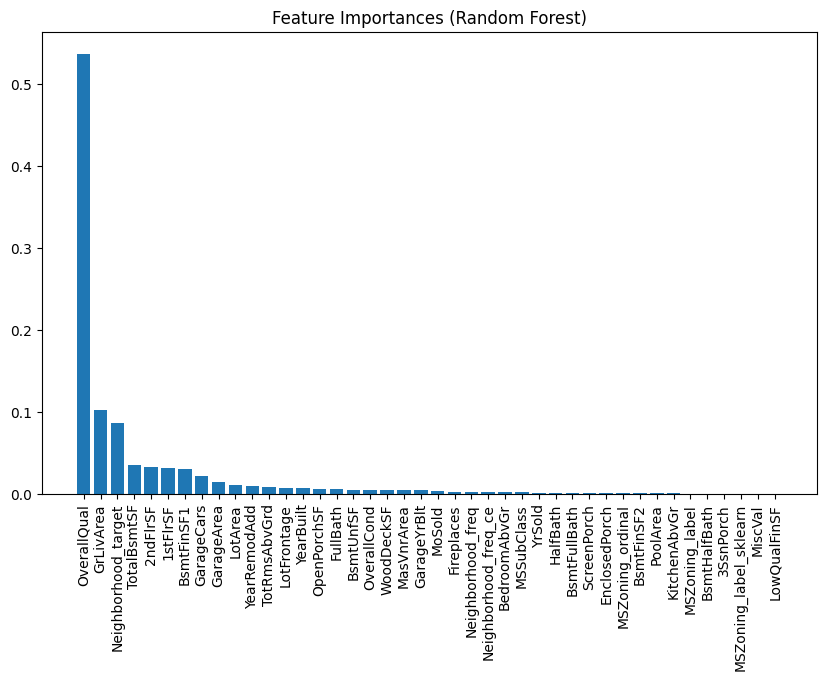

In [ ]:
# Feature importance Plot (without using RFE)

rf = RandomForestRegressor(n_estimators=100, random_state=42) # machine learning algo
rf.fit(X_rfe, y_rfe)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(X_rfe.columns)), importances[indices], align='center')
plt.xticks(range(len(X_rfe.columns)), X_rfe.columns[indices], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.show()

# Covariance & Correlation

In [114]:
df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
df_numeric = df.select_dtypes(include=['number'])


In [115]:
df_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [117]:
house_features = df_numeric[["LotArea","OverallQual","OverallCond","YearBuilt","GrLivArea","GarageCars","SalePrice"]]

In [118]:
house_features.corr(method="pearson")

,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,GarageCars,SalePrice
LotArea,1.000000,0.105806,-0.005636,0.014228,0.263116,0.154871,0.263843
OverallQual,0.105806,1.000000,-0.091932,0.572323,0.593007,0.600671,0.790982
OverallCond,-0.005636,-0.091932,1.000000,-0.375983,-0.079686,-0.185758,-0.077856
YearBuilt,0.014228,0.572323,-0.375983,1.000000,0.199010,0.537850,0.522897
GrLivArea,0.263116,0.593007,-0.079686,0.199010,1.000000,0.467247,0.708624
GarageCars,0.154871,0.600671,-0.185758,0.537850,0.467247,1.000000,0.640409
SalePrice,0.263843,0.790982,-0.077856,0.522897,0.708624,0.640409,1.000000


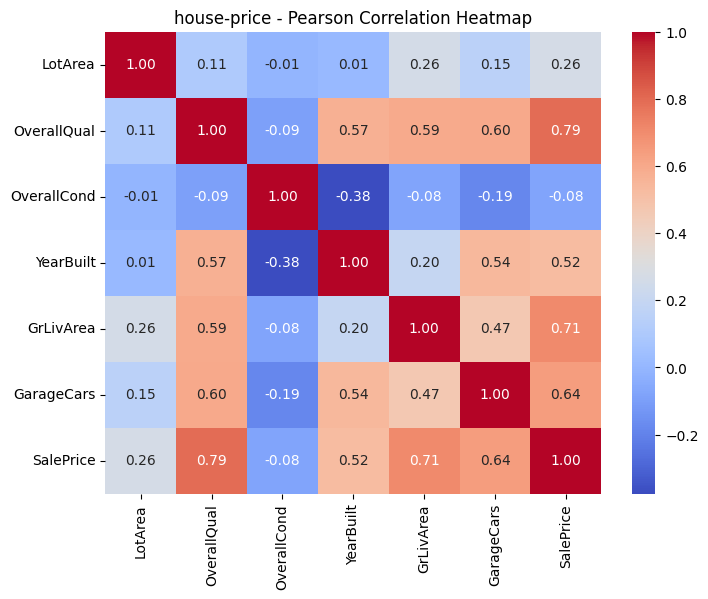

In [119]:
dataset_name = "house-price"
plt.figure(figsize=(8,6))
sns.heatmap(house_features.corr(method="pearson"), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"{dataset_name} - Pearson Correlation Heatmap")
plt.show()

# VIF

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = house_features.drop(columns=["SalePrice"])
X = sm.add_constant(X)

# print(X.shape)
# (1460, 7)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print(" High multicollinearity detected in these features:")
    print(high_vif)

       Feature          VIF
0        const  8703.125689
1      LotArea     1.086326
2  OverallQual     2.551486
3  OverallCond     1.217091
4    YearBuilt     2.078066
5    GrLivArea     1.837841
6   GarageCars     1.844446
 High multicollinearity detected in these features:
  Feature          VIF
0   const  8703.125689


In [ ]:
# Data Sampling